In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cma
import seaborn as sns
import scipy as sp
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as kf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from scipy.spatial.distance import cdist
np.random.seed(0)

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [122]:
dataset= pd.read_csv('data7.csv', header= None)
dataset.head()

,0,1,2,3
0,-5.21460,7.0880,6.72920,1
1,-0.42176,8.4266,7.89610,1
2,-6.13460,5.6864,6.08860,1
3,6.21260,8.3078,2.36230,1
4,6.34460,7.6650,0.53239,1


In [108]:
dataset.groupby([3]).size()

3
0    200
1    200
dtype: int64

[]

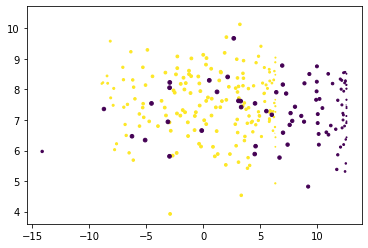

In [109]:
plt.scatter(dataset[0],dataset[1],dataset[2],c=dataset[3])
plt.plot()

In [146]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataset[range(0,3)], dataset[3], test_size=0.20, random_state=0)

In [154]:
# With Euclidean distance

centers_euc = kmeans(2, np.array(Xtrain),"euclidean")

# With Mahalanobis distance

centers_mhlb = kmeans(2, np.array(Xtrain),"mahalanobis")

# With Manhattan distance

centers_mnhtn = kmeans(2, np.array(Xtrain),"cityblock")

In [155]:
print(centers_euc)
print(centers_mhlb)
print(centers_mnhtn)

[[ 7.87457635  7.516975   -3.44046586]
 [ 0.68662395  7.51374268  7.31637445]]
[[6.93541469 7.99066409 3.25987648]
 [0.61676388 6.89634317 0.52615176]]
[[ 7.41963012  7.53432331 -3.35078573]
 [ 0.8384747   7.49558726  7.7028714 ]]


In [156]:
from sklearn.metrics import confusion_matrix 
ypred = [np.argmin(i) for i in cdist(Xtest, centers_euc)]
cm_euc = confusion_matrix(Ytest,ypred)
print(cm_euc)
ypred = [np.argmin(i) for i in cdist(Xtest, centers_mlb)]
cm_mlb = confusion_matrix(Ytest,ypred)
print(cm_mlb)
ypred = [np.argmin(i) for i in cdist(Xtest, centers_mhtn)]
cm_mhtn = confusion_matrix(Ytest,ypred)
print(cm_mhtn)

[[23 11]
 [ 5 41]]
[[ 3 31]
 [ 8 38]]
[[11 23]
 [41  5]]


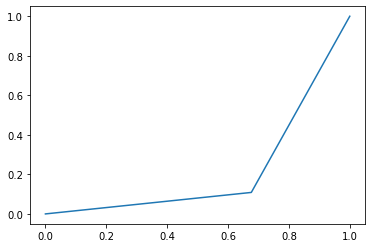

In [157]:
fpr, tpr, thresholds = roc_curve(Ytest, ypred)
plt.plot(fpr, tpr)
plt.show()

In [162]:
D_train, D_test = train_test_split(dataset, test_size=0.20, random_state=0)

In [163]:
k_values = range(3,8)
X_train, X_test, y_train, y_test = train_test_split(np.array(D_train[range(0,3)]), np.array(D_train[3]), test_size=0.2, random_state=0)
Euclidean_distance = cdist(X_test, X_train)
cm = {}

for i in k_values:
    index = np.argpartition(Euclidean_distance, i)[:,:i]
    y = sp.stats.mode(y_train[index], axis=1)[0]
    cm[i] = confusion_matrix(y_test, y)
    
for i in cm.keys():
    print(f"k = {i}: confusion matrix: \n{cm[i]}")
    
# argpartition() function is used to create a indirect partitioned copy of input array with its elements rearranged in such a 
# way that the value of the element in k-th position is in the position it would be in a sorted array.

k = 3: confusion matrix 
[[29  1]
 [ 0 34]]
k = 4: confusion matrix 
[[30  0]
 [ 0 34]]
k = 5: confusion matrix 
[[30  0]
 [ 0 34]]
k = 6: confusion matrix 
[[30  0]
 [ 0 34]]
k = 7: confusion matrix 
[[30  0]
 [ 0 34]]


In [171]:
X_train = np.array(D_train[range(0,3)])
Y_train = np.array(D_train[3])
X_test = np.array(D_test[range(0,3)])
Y_test = np.array(D_test[3])
k = 5 

# Euclidean_distance
Euclidean_distance = cdist(X_test,X_train)
index = np.argpartition(Euclidean_distance,i)[:,:i]
y = sp.stats.mode(Y_train[index],axis=1)[0]
cm = confusion_matrix(Y_test,y)
print("Confusion_matrix with Euclidean distance\n", cm)

Confusion_matrix with Euclidean distance
 [[34  0]
 [ 0 46]]


In [173]:
# Mahalanobis_distance
Mahalanobis_distance = cdist(X_test, X_train, "mahalanobis")
index = np.argpartition(Mahalanobis_distance,i)[:,:i]
y = sp.stats.mode(Y_train[index],axis=1)[0]
cm = confusion_matrix(Y_test,y)
print("Confusion_matrix with Mahalanobis distance\n", cm)

Confusion_matrix with Mahalanobis distance
 [[33  1]
 [ 1 45]]


In [172]:
# Manhattan_distance
Manhattan_distance = cdist(X_test, X_train, "cityblock")
index = np.argpartition(Manhattan_distance,i)[:,:i]
y = sp.stats.mode(Y_train[index],axis=1)[0]
cm = confusion_matrix(Y_test,y)
print("Confusion_matrix with Manhattan distance\n", cm)

Confusion_matrix with Manhattan distance
 [[34  0]
 [ 0 46]]


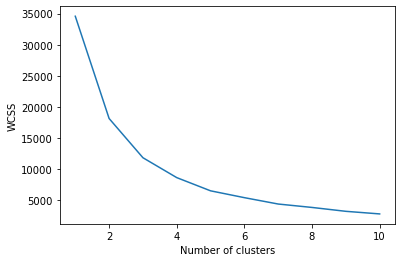

In [183]:
X = dataset.iloc[:, [0,1,2]].values

from sklearn.cluster import KMeans


# Elbow Method:
# In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating
# WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. 

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

## Practice

In [90]:
from math import sqrt
# Calculate the Euclidean distance between two vectors            
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2   
    return sqrt(distance)

In [104]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))   
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [105]:
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [53]:
import os
os.chdir(r"E:\M.Tech IIST\Data Mining\Assignment\Assignment 5\assign_5")
dataset= pd.read_csv('data7.csv', header= None)
dataset.head()

,0,1,2,3
0,-5.21460,7.0880,6.72920,1
1,-0.42176,8.4266,7.89610,1
2,-6.13460,5.6864,6.08860,1
3,6.21260,8.3078,2.36230,1
4,6.34460,7.6650,0.53239,1


In [54]:
dataset.groupby([3]).size()

3
0    200
1    200
dtype: int64

[]

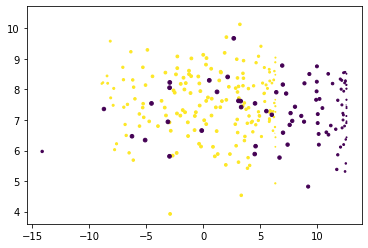

In [55]:
plt.scatter(dataset[0],dataset[1],dataset[2],c=dataset[3])
plt.plot()

In [57]:
dataset = np.array(dataset)

In [106]:
prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 1, Got 1.


In [66]:
dataset[2]

array([-6.1346,  5.6864,  6.0886,  1.    ])

In [65]:
dataset[2][0]

-6.1346

In [69]:
print(euclidean_distance(dataset[2],dataset[0]))

1.7947843658779739


In [70]:
print(euclidean_distance(dataset[0],dataset[0]))

0.0


In [71]:
print(euclidean_distance(dataset[1],dataset[0]))

5.111244548600664
